# <center>Exploratory Data Analysis</center>

#### Dataset :  
LearnX Sales Data

#### Source: 
Analytics Vidhya

#### Dataset Description: 
LearnX is an online learning platform aimed at professionals and students. The platform covers a wide variety of topics including Development, Business, Finance & Accounting & Software Marketing and so on. The dataset contains daywise information about 600 courses available over a span of more than 2 years. Also provides other information like user traffic, holidays, course type, promotions.

#### Aim:
This case study aims at finding meaningful insights from the data which may further provide a base for making  varied decisions.

#### Approach:
1. Understanding the attributes
2. Checked for presence of missing values and its treatment with appropriate logics.
3. Perfromed Univariate and Bivariate Analysis on the attributes given along with statistical significance test.

### 1. Importing Libraries

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.chdir('E:/Data Science/Competitions/data/Time Series Forecasting/LearnX_Sales_Forecasting')

### 2. Reading Data

In [8]:
df = pd.read_csv('train.csv')

In [9]:
df.head()

,ID,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales
0,1,1,1,Development,Course,0,1,1,11004,0.007,81
1,2,2,1,Development,Course,0,0,1,13650,0.007,79
2,3,3,1,Development,Course,0,0,1,11655,0.007,75
3,4,4,1,Development,Course,0,0,1,12054,0.007,80
4,5,5,1,Development,Course,0,0,1,6804,0.007,41


In [10]:
ndf = df.drop(['ID','Course_ID'],axis=1)
ndf.head()

,Day_No,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales
0,1,Development,Course,0,1,1,11004,0.007,81
1,2,Development,Course,0,0,1,13650,0.007,79
2,3,Development,Course,0,0,1,11655,0.007,75
3,4,Development,Course,0,0,1,12054,0.007,80
4,5,Development,Course,0,0,1,6804,0.007,41


In [11]:
ndf.shape

(512087, 9)

In [12]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512087 entries, 0 to 512086
Data columns (total 9 columns):
Day_No                512087 non-null int64
Course_Domain         512087 non-null object
Course_Type           512087 non-null object
Short_Promotion       512087 non-null int64
Public_Holiday        512087 non-null int64
Long_Promotion        512087 non-null int64
User_Traffic          512087 non-null int64
Competition_Metric    510323 non-null float64
Sales                 512087 non-null int64
dtypes: float64(1), int64(6), object(2)
memory usage: 35.2+ MB


### 3. Descriptive Statistics

In [13]:
# Numerical Features
ndf.describe()

,Day_No,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales
count,512087.000000,512087.000000,512087.000000,512087.000000,512087.000000,510323.000000,512087.000000
mean,434.917869,0.380244,0.031639,0.488968,15375.101198,0.073345,120.826924
std,256.044161,0.485447,0.175038,0.499879,7727.231205,0.100115,54.355258
min,1.000000,0.000000,0.000000,0.000000,168.000000,0.000000,0.000000
25%,214.000000,0.000000,0.000000,0.000000,10584.000000,0.010000,84.000000
50%,427.000000,0.000000,0.000000,0.000000,13776.000000,0.035000,111.000000
75%,658.000000,1.000000,0.000000,1.000000,18123.000000,0.094000,146.000000
max,882.000000,1.000000,1.000000,1.000000,100002.000000,0.768000,682.000000


In [14]:
# Categorical Features
ndf.describe(include='object')

,Course_Domain,Course_Type
count,512087,512087
unique,4,3
top,Development,Course
freq,264295,262747


### 4. Relationship between the variables

In [15]:
corr = ndf.corr()
corr

,Day_No,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales
Day_No,1.000000,0.014645,0.019112,-0.020204,0.021511,0.003229,0.060012
Short_Promotion,0.014645,1.000000,-0.018770,-0.001149,0.198785,0.000182,0.367762
Public_Holiday,0.019112,-0.018770,1.000000,0.008319,-0.108305,-0.000491,-0.135052
Long_Promotion,-0.020204,-0.001149,0.008319,1.000000,-0.204289,-0.119382,-0.109455
User_Traffic,0.021511,0.198785,-0.108305,-0.204289,1.000000,-0.148775,0.829741
Competition_Metric,0.003229,0.000182,-0.000491,-0.119382,-0.148775,1.000000,-0.022085
Sales,0.060012,0.367762,-0.135052,-0.109455,0.829741,-0.022085,1.000000


In [16]:
# Features having high correlation with target Sales

corr[corr['Sales']>0.4].apply(lambda x: abs(x))['Sales']

User_Traffic    0.829741
Sales           1.000000
Name: Sales, dtype: float64

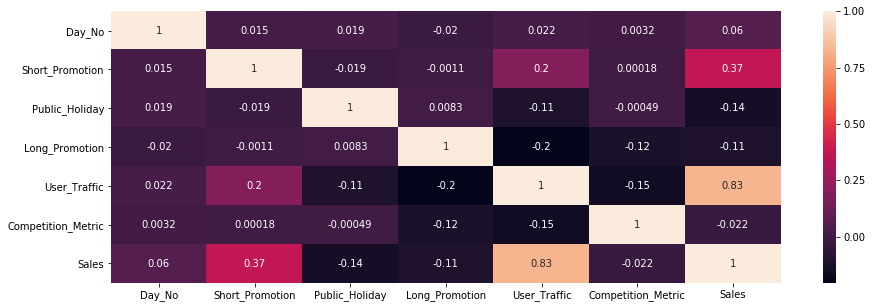

In [17]:
plt.figure(figsize=(15,5))
x = sns.heatmap(ndf.corr(),annot = True)
bottom, top = x.get_ylim()
x.set_ylim(bottom + 0.5 , top - 0.5)
plt.show()

### 5. Check for missing values

In [18]:
ndf.isnull().sum()

Day_No                   0
Course_Domain            0
Course_Type              0
Short_Promotion          0
Public_Holiday           0
Long_Promotion           0
User_Traffic             0
Competition_Metric    1764
Sales                    0
dtype: int64

For Competition_Metric, mean > median, can replace the null values with median

### 6. Replacing null values

In [35]:
ndf['Competition_Metric'] = ndf['Competition_Metric'].fillna(ndf['Competition_Metric'].median())

In [36]:
ndf.isnull().sum()

Day_No                0
Course_Domain         0
Course_Type           0
Short_Promotion       0
Public_Holiday        0
Long_Promotion        0
User_Traffic          0
Competition_Metric    0
Sales                 0
dtype: int64

In [21]:
num_cols = list(ndf.select_dtypes(exclude='object').columns)
print(num_cols)

['Day_No', 'Short_Promotion', 'Public_Holiday', 'Long_Promotion', 'User_Traffic', 'Competition_Metric', 'Sales']


In [22]:
cat_cols = list(ndf.select_dtypes(include='object').columns)
print(cat_cols)

['Course_Domain', 'Course_Type']


### A] Univariate Analysis

In [23]:
## For Numerical Features

def build_dist_plot(c):
    sns.distplot(ndf[c])
    plt.show()
    
def build_hist_plot(c):
    sns.distplot(ndf[c],kde=False)
    plt.show()

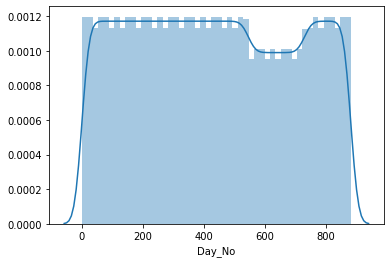

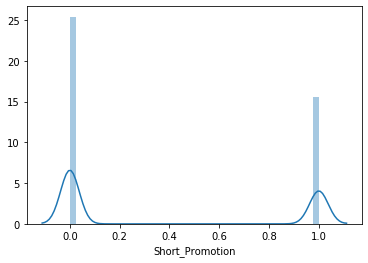

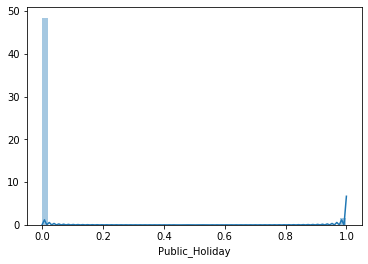

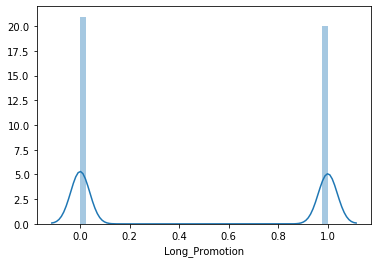

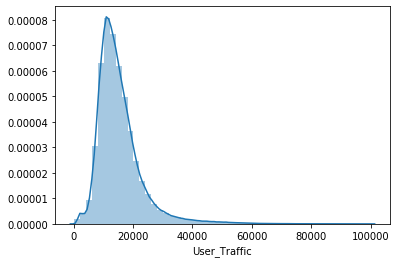

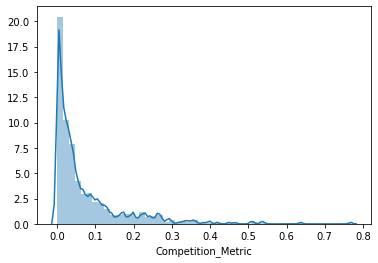

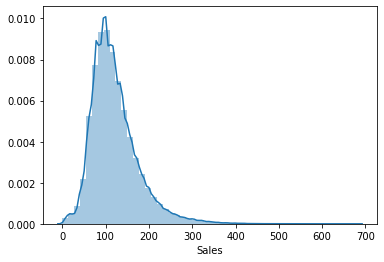

In [24]:
for col in num_cols:
    build_dist_plot(col)

Observations:
    
1. The data is right skewed.

2. A drop in Day_No is observed. It may be that during these days the courses might not have released.

In [25]:
## For Categorical Features
def build_count_plot(c):
    plt.figure(figsize= (15,5))
    sns.countplot(ndf[c])
    plt.show()

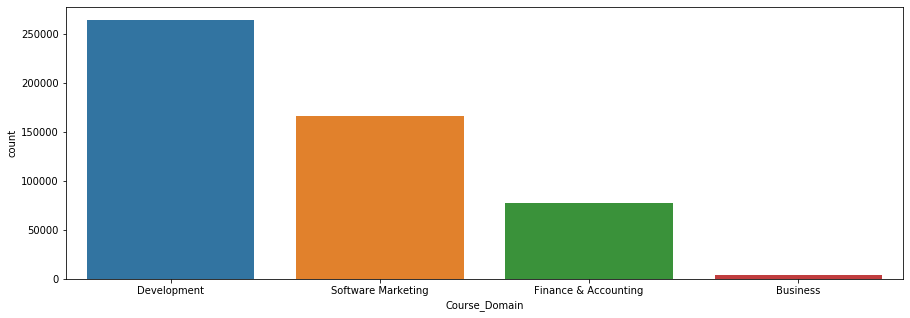

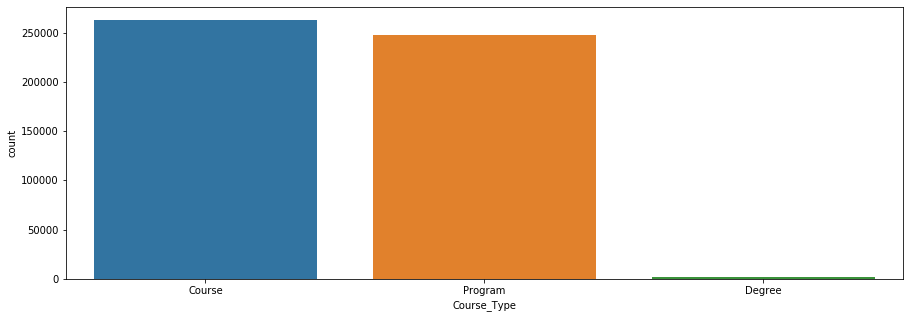

In [26]:
for col in cat_cols:
    build_count_plot(col)

## Inferences:

1. Course_Domain

    - highest number of development courses
    - lowest number of business courses
    - moderate number of software marketing courses
    - a few finance courses compared to software marketing courses


2. Course_Type 

    - Courses seems to be higher
        1. These courses may be short term
        2. Also, might be conducted on weekends
        3. mostly taken up by working professionals
        
    - Program has a good number of courses
        1. The duration of the program might be longer than courses
        2. might be conducted on weekdays
        3. mostly taken up by students who completed the graduation and want to upskill themselves
        
    - Degree has very few enrollments
        1. The duration might go upto 1 or more years
        2. mostly taken up by students after HSC
        
        
3. Short_Promotion / Long_Promotion / Public_Holiday
    
    - Long_Promotion are applied to most of the courses as compared to Short_Promotion
    - there were a few public holidays

### B] Bivariate Analysis

In [27]:
## For Numerical Features
def build_scatter_plot(c):
    plt.figure(figsize=(20,5))
    sns.scatterplot(x = ndf[c], y = ndf['Sales'], data = ndf)
    plt.show()

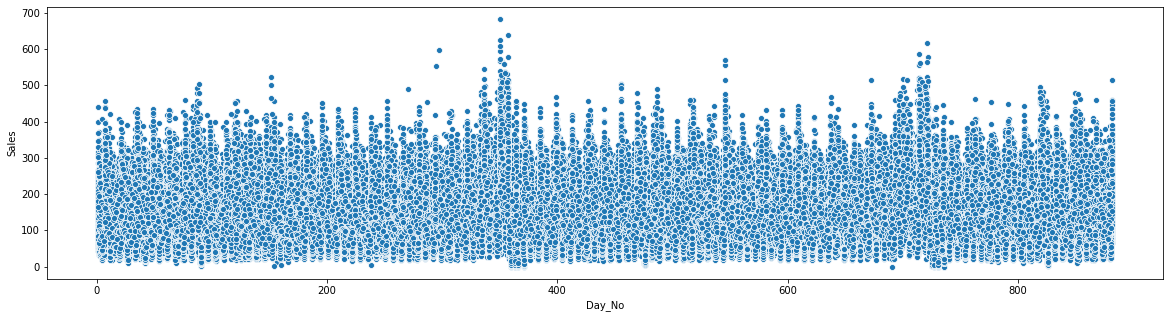

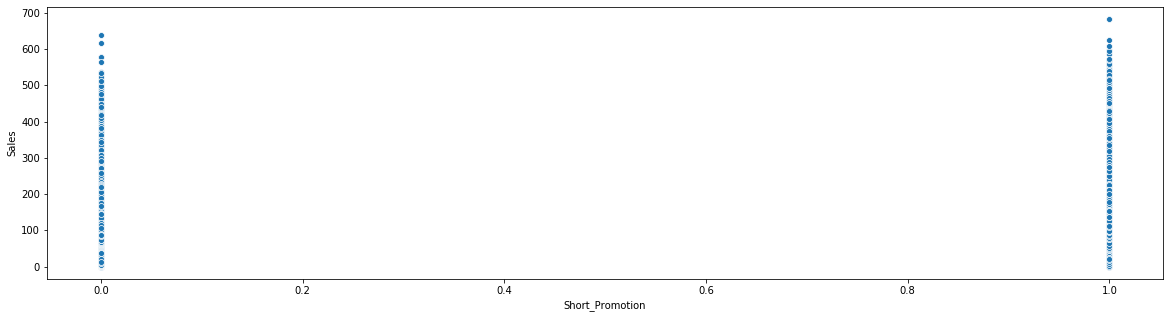

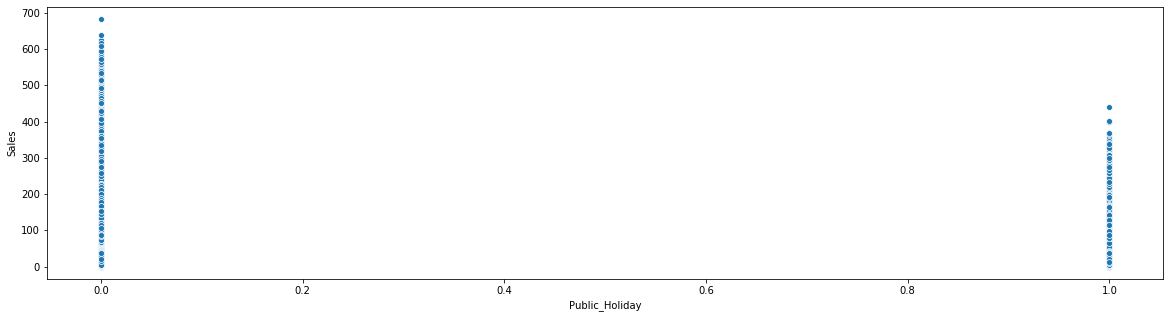

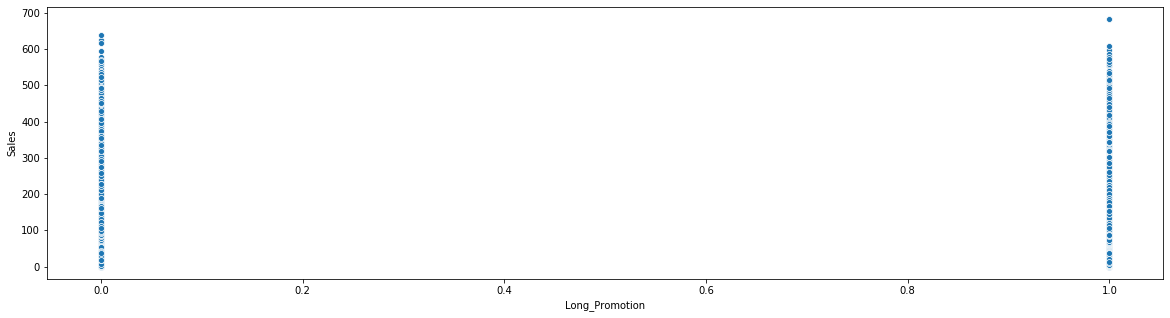

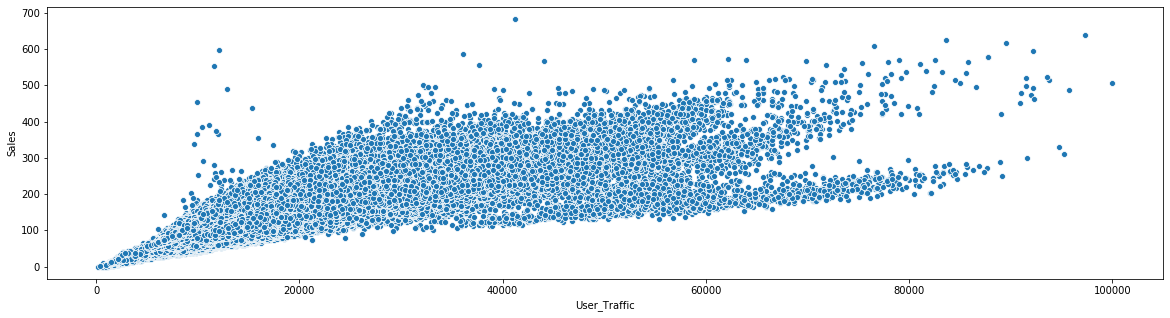

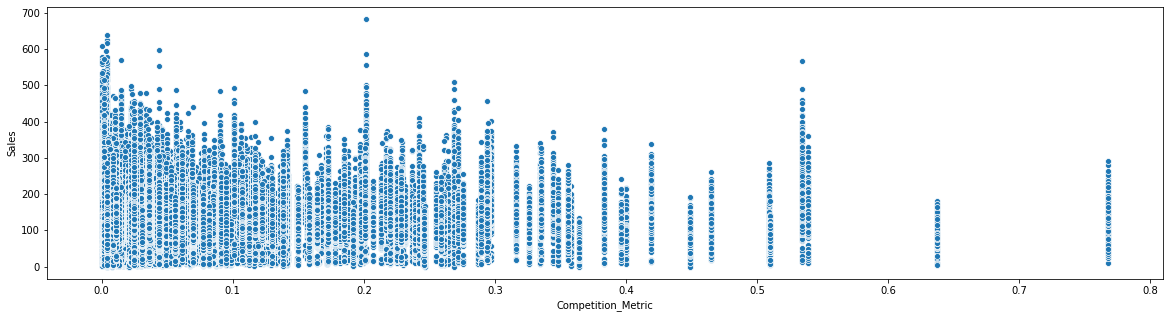

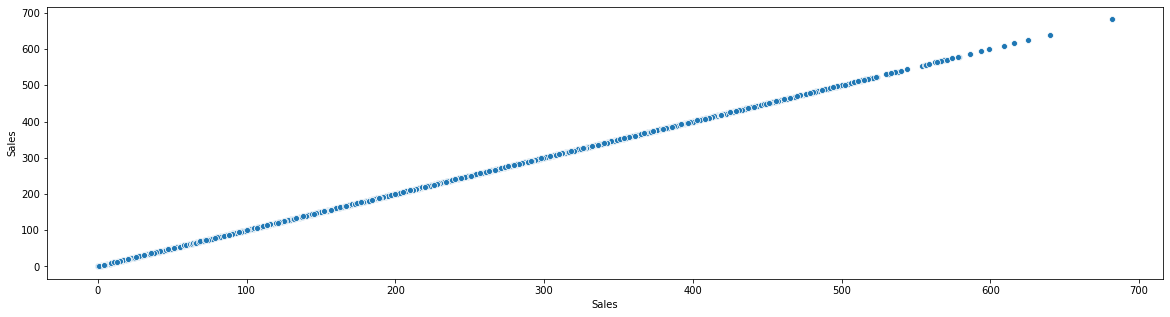

In [28]:
for col in num_cols:
    build_scatter_plot(col)

In [27]:
## For Categorical Features
def build_box_plot(col):
    plt.figure(figsize = (15,5))
    sns.boxplot(x = ndf[col], y = ndf['Sales'], data = ndf)
    plt.show()

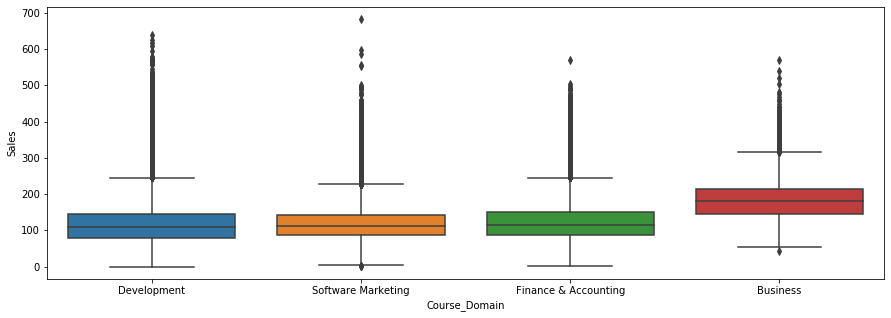

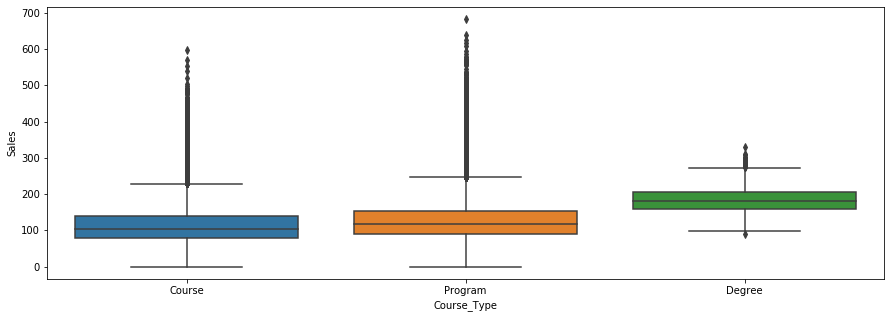

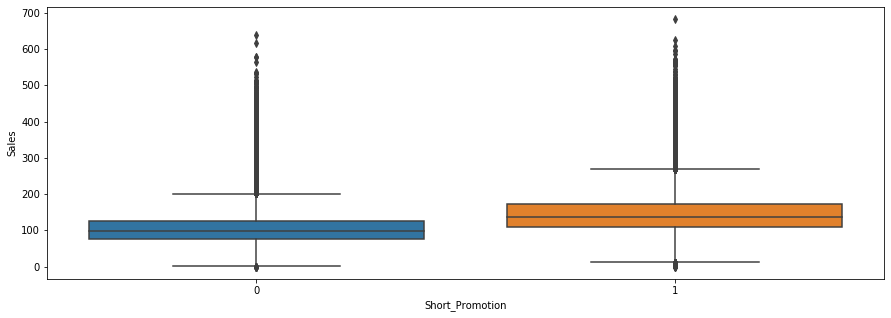

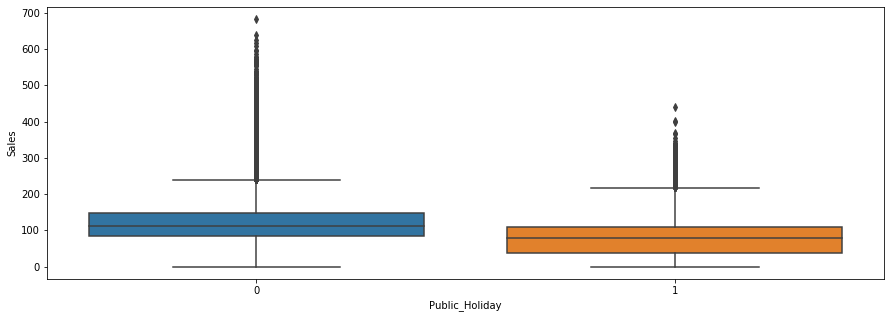

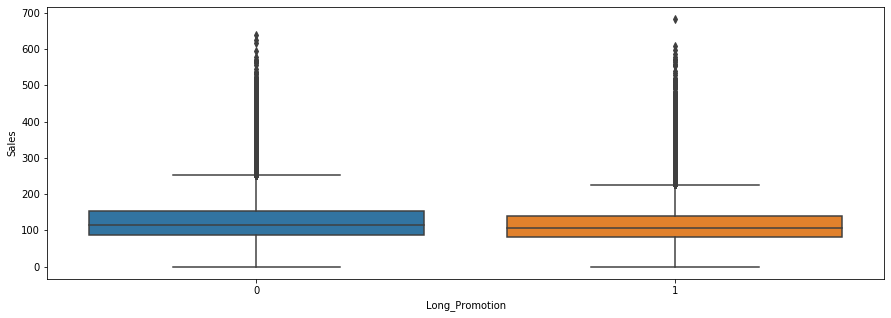

In [28]:
for col in cat_cols:
    build_box_plot(col)

### Categorical feature wise User Traffic

In [29]:
def build_box_plot(col):
    plt.figure(figsize = (15,5))
    sns.boxplot(x = ndf[col], y = ndf['User_Traffic'], data = ndf)
    plt.show()

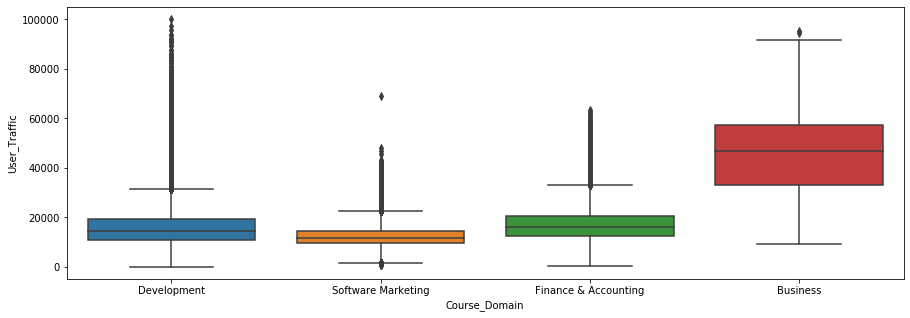

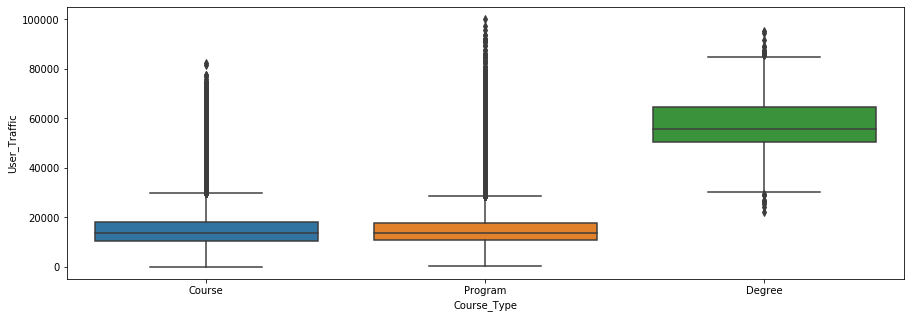

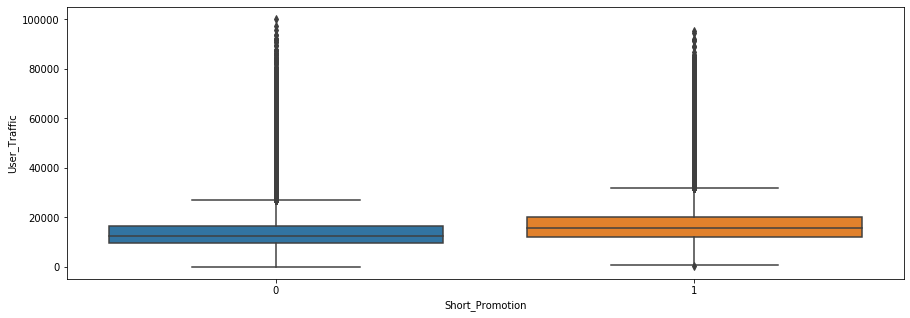

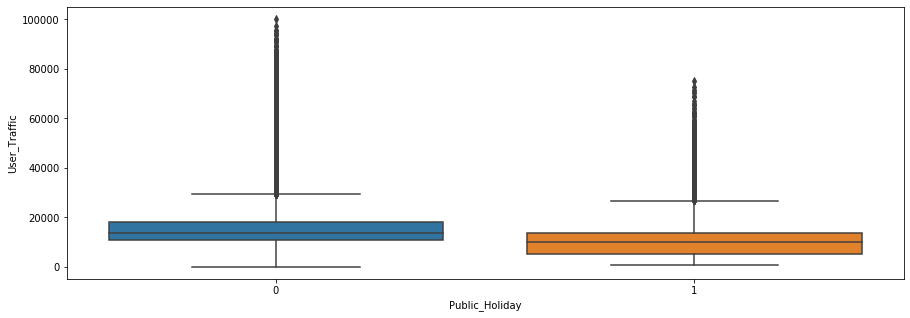

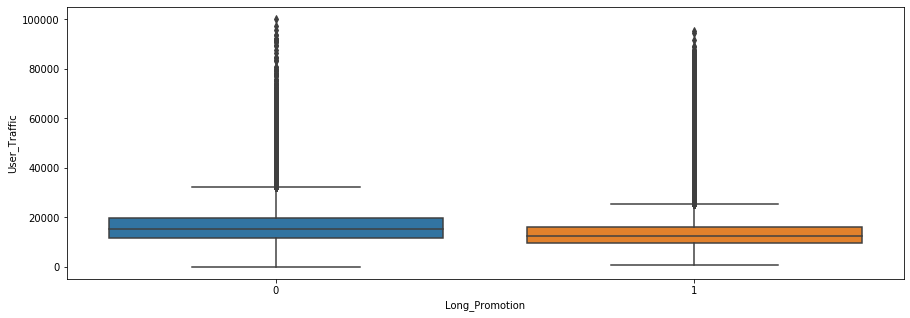

In [30]:
for col in cat_cols:
    build_box_plot(col)

## Inferences:
1. The sales are mostly drived by course domains other than business
2. The business course domain and degree as course type observed a huge user traffic but from the sales figure we can say that most of those user traffics are not converted to enrollments. The reasons for this might be:
    - Degree course type is expensive
    - the syllabus might not be that relevant
3. There is a possibility that Business domain provides Degree course type.

In [31]:
ndf.head()

,Day_No,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales
0,1,Development,Course,0,1,1,11004,0.007,81
1,2,Development,Course,0,0,1,13650,0.007,79
2,3,Development,Course,0,0,1,11655,0.007,75
3,4,Development,Course,0,0,1,12054,0.007,80
4,5,Development,Course,0,0,1,6804,0.007,41


In [32]:
domain = ndf['Course_Domain'].unique()

## Course Types offered by Course Domains

In [33]:
ct = []

ct_dict = {}

for d in domain:
    ct.append(list(ndf[ndf['Course_Domain'] == d]['Course_Type'].value_counts().index))

ct_dict.update({'course_domain': domain,'course_type_offered': ct})
    
pd.DataFrame(ct_dict)

,course_domain,course_type_offered
0,Development,"[Course, Program]"
1,Software Marketing,"[Program, Course]"
2,Finance & Accounting,"[Course, Program]"
3,Business,"[Course, Degree]"


#### Business course domain offers Degree. Others offer only course and program


## Distribution of Course Types

In [34]:
pd.crosstab(index = ndf['Course_Domain'], columns = ndf['Course_Type'])

Course_Type,Course,Degree,Program
Course_Domain,,,
Business,2646,1764,0
Development,158163,0,106132
Finance & Accounting,40020,0,37190
Software Marketing,61918,0,104254


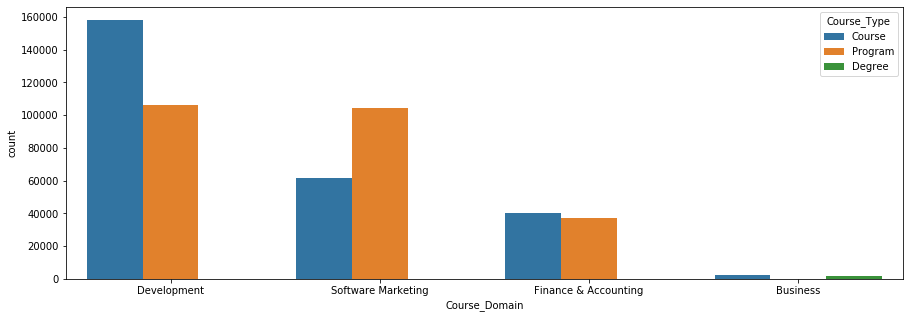

In [35]:
plt.figure(figsize = (15,5))
sns.countplot(ndf['Course_Domain'], hue = ndf['Course_Type'])
plt.show()

## Course Domain wise Sales

In [36]:
cd_sales = pd.crosstab(index = ndf['Course_Domain'], columns = ['Total_Sales'] ,values = ndf['Sales'], aggfunc = 'sum')
cd_sales

col_0,Total_Sales
Course_Domain,
Business,822875
Development,31719732
Finance & Accounting,9614207
Software Marketing,19717083


In [37]:
cd_sales['Sales%'] = cd_sales['Total_Sales']/cd_sales['Total_Sales'].sum()

In [38]:
cd_sales.insert(0, 'Total_Courses_Offered', ndf['Course_Domain'].value_counts())

In [39]:
cd_sales.insert(1, 'Total_User_Traffic', ndf.groupby('Course_Domain')['User_Traffic'].sum().values)

In [40]:
cd_sales['Conversion%'] = cd_sales['Total_Sales']/cd_sales['Total_User_Traffic']
cd_sales

col_0,Total_Courses_Offered,Total_User_Traffic,Total_Sales,Sales%,Conversion%
Course_Domain,,,,,
Business,4410,198992199,822875,0.013299,0.004135
Development,264295,4281154227,31719732,0.512651,0.007409
Finance & Accounting,77210,1333475157,9614207,0.155384,0.007210
Software Marketing,166172,2059767864,19717083,0.318666,0.009572


In [41]:
pd.crosstab(index = ndf['Course_Domain'], columns = ndf['Short_Promotion'], colnames = ['short_promo'])

short_promo,0,1
Course_Domain,,
Business,2730,1680
Development,163767,100528
Finance & Accounting,47824,29386
Software Marketing,103048,63124


In [42]:
pd.crosstab(index = ndf['Course_Domain'], columns = ndf['Long_Promotion'], colnames = ['long_promo'])

long_promo,0,1
Course_Domain,,
Business,2646,1764
Development,149387,114908
Finance & Accounting,44100,33110
Software Marketing,65560,100612


## Inferences:
1. Inspite of higher user traffic for business domain, the conversion rate is very low that is 0.004135 %
2. also the contribution to sales is high by development domain and lowest by business domain with 50% and 1.3% respectively.
3. Short or long promotions are applied only to course and program course types

## Comparison of Course Type Sales within the course domains

In [87]:
pd.crosstab(index = ndf['Course_Type'], columns = ndf['Course_Domain'], values = ndf['Sales'], aggfunc = 'mean')

Course_Domain,Business,Development,Finance & Accounting,Software Marketing
Course_Type,,,,
Course,188.280801,110.849200,120.157771,112.395668
Degree,184.061224,NaN,NaN,NaN
Program,NaN,133.677779,129.214654,122.371976


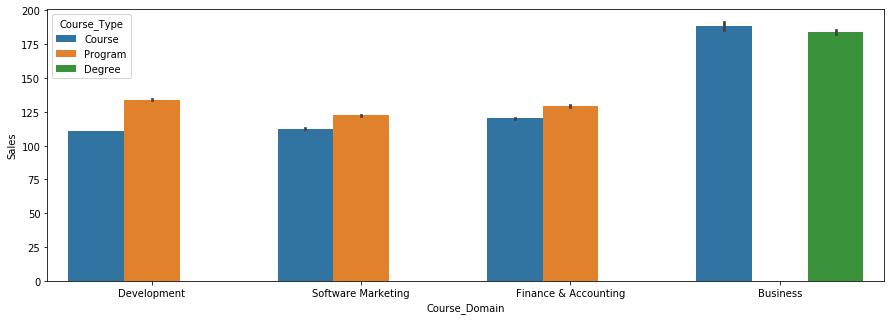

In [115]:
plt.figure(figsize = (15,5))
sns.barplot(x = ndf['Course_Domain'], y = ndf['Sales'], data = ndf, hue = ndf['Course_Type'])
plt.show()

## Comparison of Course Type User Traffic within the course domains

In [88]:
pd.crosstab(index = ndf['Course_Type'], columns = ndf['Course_Domain'], values = ndf['User_Traffic'], aggfunc = 'mean')

Course_Domain,Business,Development,Finance & Accounting,Software Marketing
Course_Type,,,,
Course,36959.920635,15062.113276,17483.727361,12152.763219
Degree,57367.488095,NaN,NaN,NaN
Program,NaN,17891.731099,17041.580748,12539.500364


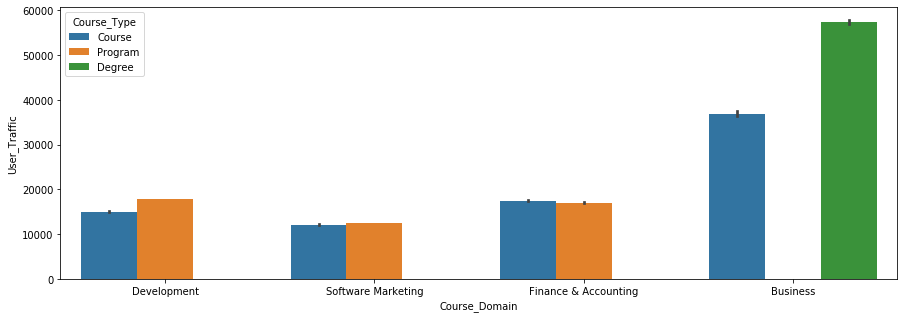

In [53]:

plt.figure(figsize = (15,5))
sns.barplot(x = ndf['Course_Domain'], y = ndf['User_Traffic'], data = ndf, hue = ndf['Course_Type'])
plt.show()


### 7. Checking Statistical Significance of the features

In [29]:
from scipy.stats import ttest_rel,f_oneway,chi2_contingency,ttest_ind

target = 'Sales'

In [30]:

# ANOVA 
# H0: the means of the population are equal | H1: Atleast one of them is different
def anova_test(col,arr):
    t = []
    for i in arr:
            d = ndf[ndf[col]==i][target]
            t.append(d)
    fstat,p = f_oneway(*t)
    return p

# Two sample ttest 
# H0: the means of both populations are equal | H1: the means are not equal.

def two_sample_ttest(col,arr):
    t = []
    for i in arr:
            d = ndf[ndf[col]==i][target]
            t.append(d)
    t, p = ttest_ind(*t)
    return p

In [33]:
ttest_rel(df['User_Traffic'],df['Sales'])

Ttest_relResult(statistic=1420.948589116189, pvalue=0.0)

##### As pvalue is < 0.05 for variables other than Sales, reject null, conclude that the features do not have same mean and are statistically significant

In [38]:
unique_dict = {i:list(ndf[i].unique()) for i in cat_cols}

In [39]:
pval = []
results = {}

for col,arr in unique_dict.items():
    if len(arr)>2:
        pval.append(anova_test(col,arr))
    else:
        pval.append(two_sample_ttest(col,arr))

results.update({'variable':cat_cols, 'pvalue': pval})
pd.DataFrame(results)

,variable,pvalue
0,Course_Domain,0.0
1,Course_Type,0.0



1.ANOVA is performed on Course_domain and course_type 

- As pvalue is < 0.05 for variables , reject null, conclude that the features have different means and are statistically significant

2.Two sample ttest is performed on short_promotion,long_promotion, public_holiday

- As pvalue is < 0.05 for variables , reject null,features are statistically significant


### 8. Checking for Outliers in the data

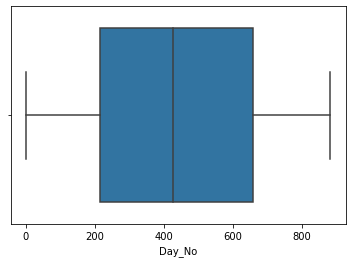

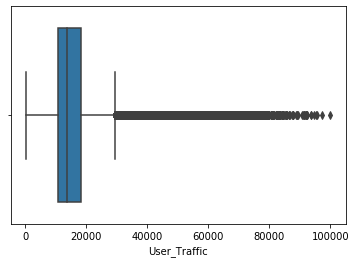

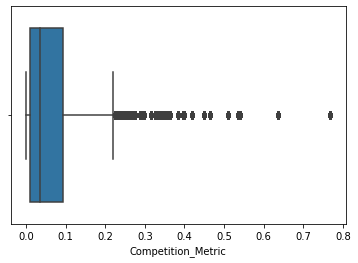

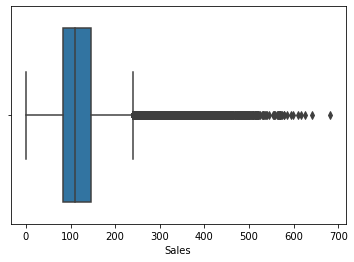

In [49]:
for i in num_cols:
    sns.boxplot(ndf[i])
    plt.show()

### Inferences:
1. There are outliers in the data.
2. To reduce these we need to transform them or need to understand why these are present in order to keep only the relevant one.

### 9. Converting Categorical Data using get_dummies

In [50]:
ndf1 = ndf.copy()

In [53]:
ndf1 = pd.get_dummies(ndf1,columns=cat_cols, prefix=['CD','CT','SP','PH','LG'],drop_first=True)

In [54]:
ndf1.shape

(512087, 12)

In [55]:
ndf1.head()

,Day_No,User_Traffic,Competition_Metric,Sales,CD_Development,CD_Finance & Accounting,CD_Software Marketing,CT_Degree,CT_Program,SP_1,PH_1,LG_1
0,1,11004,0.007,81,1,0,0,0,0,0,1,1
1,2,13650,0.007,79,1,0,0,0,0,0,0,1
2,3,11655,0.007,75,1,0,0,0,0,0,0,1
3,4,12054,0.007,80,1,0,0,0,0,0,0,1
4,5,6804,0.007,41,1,0,0,0,0,0,0,1
